In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import string

Load Data

In [ ]:
Df = pd.read_csv("/content/Hotel_data.csv")
Df.head()

,Title,Price,Location,Offer,Rating,Review,No_of_ratings,Discount,Special,City,From_Date,To_Date
0,Fortune Select JP Cosmos - Member ITC Hotel Group,"3,188",Vasanth Nagar | 4.2 km from Kempegowda Bus Sta...,NaN,3.9,Good,2384.0,15%,"Lounge, Butler Services, Free Parking",Bangalore,9/8/2021,11/8/2021
1,Vividus,"4,133",Gandhi Nagar | 2.0 km from Kempegowda Bus Station,Exclusive Offer - HDFC Credit Card Users. Get ...,4.4,Very Good,676.0,36%,"Free Parking, Business Centre, Conference Room",Bangalore,9/8/2021,11/8/2021
2,Bannerghatta Nature Camp by Jungle Lodges,"5,253",NaN,Exclusive Offer - HDFC Credit Card Users. Get ...,4.7,Excellent,48.0,14%,"Kitchenette, Outdoor Sports, Lawn",Bangalore,9/8/2021,11/8/2021
3,Starlit Suites,"2,094",Bommasandra,Exclusive Offer - HDFC Credit Card Users. Get ...,4.2,Very Good,362.0,25%,"Lounge, Free Parking, Business Centre",Bangalore,9/8/2021,11/8/2021
4,The Park Bangalore,"2,364",Ulsoor,Exclusive Offer - HDFC Credit Card Users. Get ...,4.0,Very Good,2649.0,32%,"Lounge, Free Parking, Business Centre",Bangalore,9/8/2021,11/8/2021


DATA Cleaning

In [ ]:
Df = Df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation)) if isinstance(text, str) else text
Df = Df.applymap(remove_punctuation)



In [ ]:
# Count the no. of rows and columns
Df.shape

(8050, 12)

In [ ]:
#Count of the empty values in each column
Df.isna().sum()

Title               0
Price               0
Location           49
Offer             703
Rating           1134
Review           1935
No_of_ratings    1134
Discount          368
Special             0
City                0
From_Date           0
To_Date             0
dtype: int64

In [ ]:
#Drop the column with all missing values

Df=Df.dropna()


In [ ]:
Df = Df.drop([ 'From_Date', 'To_Date','Location','Offer','Discount'],axis = 1)

Df

,Title,Price,Rating,Review,No_of_ratings,Special,City
1,vividus,4133,4.4,very good,676.0,free parking business centre conference room,bangalore
3,starlit suites,2094,4.2,very good,362.0,lounge free parking business centre,bangalore
4,the park bangalore,2364,4.0,very good,2649.0,lounge free parking business centre,bangalore
5,the lalit ashok bangalore,3008,3.9,good,1233.0,lounge free parking business centre,bangalore
6,ramada encore,1520,4.5,excellent,2889.0,lounge free parking business centre,bangalore
...,...,...,...,...,...,...,...
8034,oyo 37003 hotel shreshta inn,2106,3.2,good,38.0,free wifi elevatorlift air conditioning,warangal
8035,hotel shreya,1505,3.2,good,151.0,business centre conference room bar,warangal
8036,oyo 17316 radika residency,1740,3.5,good,95.0,free wifi air conditioning room service,warangal
8042,suprabha hotel,3105,5.0,excellent,1.0,tours and treks elevatorlift air conditioning,warangal


In [ ]:
Df.shape

(5307, 7)

In [ ]:
Df['Special'].unique()

array(['free parking business centre conference room',
       'lounge free parking business centre', 'golf yoga lounge',
       'lounge butler services tours and treks',
       'free parking free shuttle service conference room',
       'lounge kids play area free parking',
       'golf free parking business centre',
       'free parking kids play area childcare services',
       'indoor games free parking conference room',
       'free wifi elevatorlift 24hour cafe',
       'butler services free parking business centre',
       'free parking free wifi elevatorlift',
       'free wifi kitchenette cafe',
       'free parking conference room free wifi',
       'free parking business centre bar',
       'free wifi elevatorlift air conditioning',
       'free parking conference room bar',
       'indoor games free parking business centre',
       'business centre conference room bar',
       'lounge free parking bakery', 'lounge indoor games free parking',
       'lounge free wifi kitchene

In [ ]:
Df.dtypes

Title             object
Price             object
Rating           float64
Review            object
No_of_ratings    float64
Special           object
City              object
dtype: object

In [ ]:
l=list()
for i in Df['Price']:
  i = float(i.replace(',', ''))
  l.append(i)
Df['Price']=l


In [ ]:
Df.dtypes

Title             object
Price            float64
Rating           float64
Review            object
No_of_ratings    float64
Special           object
City              object
dtype: object

In [ ]:
Df["Rating"].describe()

count    5307.000000
mean        3.858187
std         0.476443
min         3.000000
25%         3.500000
50%         3.900000
75%         4.200000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
Df['Review'].value_counts()

 good         3061
 very good    1677
 excellent     569
Name: Review, dtype: int64

DATA VISUALISATION


<Axes: xlabel='Review', ylabel='count'>

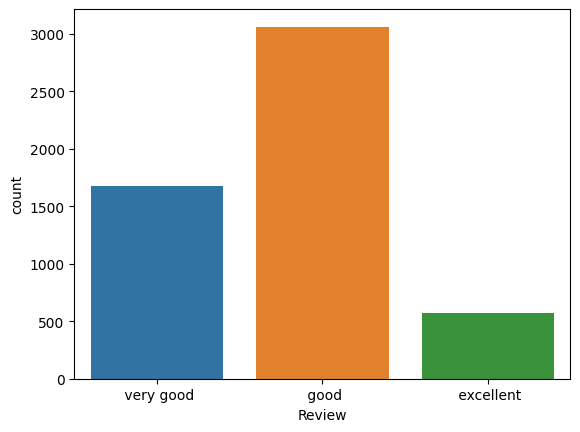

In [ ]:
sns.countplot(x = Df['Review'], label = 'Review Count')


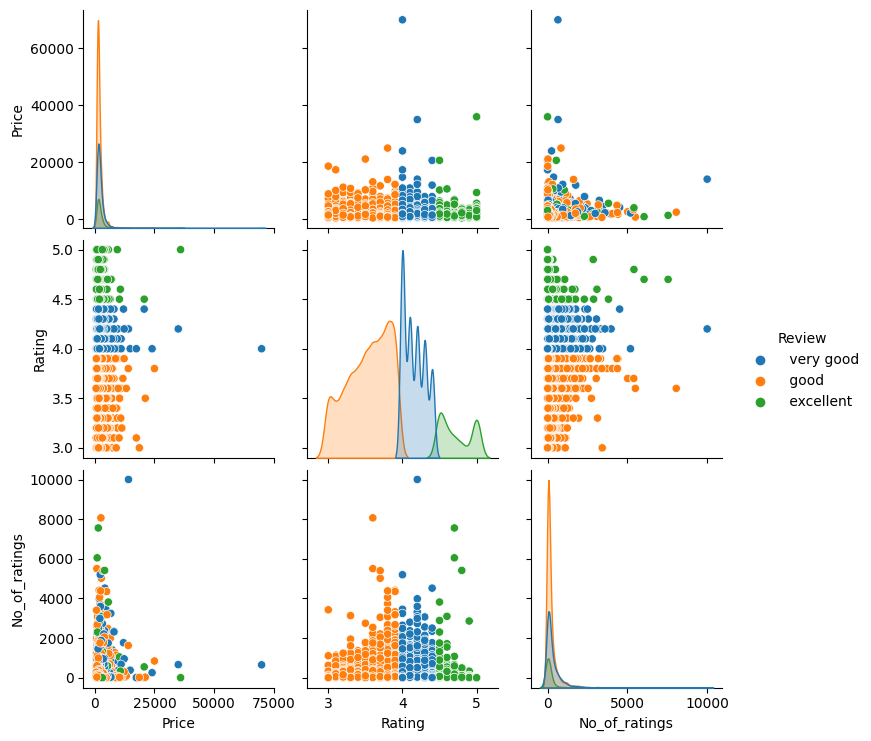

In [ ]:
#create a pair plot
sns.pairplot(Df.iloc[:,1:], hue ='Review')

In [ ]:
#correlation
Df.iloc[:,1:].corr()*100

<ipython-input-18-f24ad76d14b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.iloc[:,1:].corr()*100


,Price,Rating,No_of_ratings
Price,100.000000,5.708059,15.308998
Rating,5.708059,100.000000,6.350854
No_of_ratings,15.308998,6.350854,100.000000


<ipython-input-19-a55958b6a9f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.iloc[:,1:].corr(), annot = True, fmt = '.0%')


<Axes: >

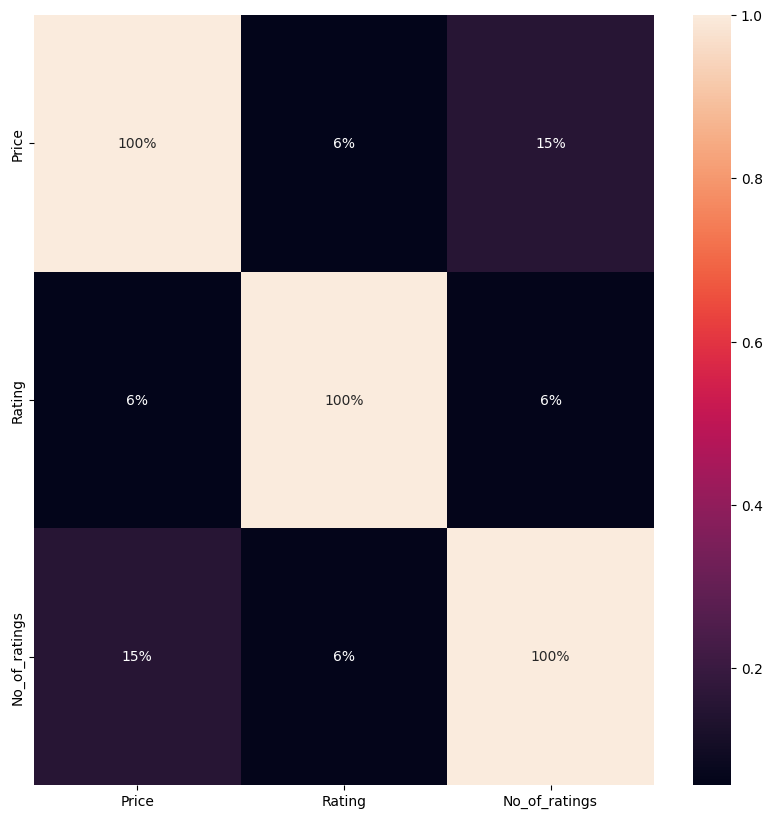

In [ ]:
#visualize correlation
plt.figure(figsize= (10,10))
sns.heatmap(Df.iloc[:,1:].corr(), annot = True, fmt = '.0%')

In [ ]:
!pip install tensorflow 
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.0 MB/s eta 0:00:00


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import tensorflow_text as text

In [ ]:
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [ ]:
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1",trainable=True)

In [ ]:
def get_bert_embeddings(text, preprocessor, encoder):

  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  encoder_inputs = preprocessor(text_input)
  outputs = encoder(encoder_inputs)
  embedding_model = tf.keras.Model(text_input, outputs['pooled_output'])
  sentences = tf.constant([text])
  return embedding_model(sentences)

Df['encodings'] = Df['Special'].apply(lambda x: get_bert_embeddings(x, preprocessor, encoder))

In [ ]:
import re
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def preprocess_text():
  text = input("Enter the facilities you would like in your hotel : ")
  text = text.lower()
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  return text
  
query_text = preprocess_text()
query_encoding = get_bert_embeddings(query_text, preprocessor, encoder)


In [ ]:
def recommend_hotel(city, price, user_preference):
   
    df_filtered = Df[(Df['City'] == city) & (Df['Price'] <= price)]
    if len(df_filtered) > 0:
        
        df_filtered['similarity_score'] = df_filtered['encodings'].apply(lambda x: metrics.pairwise.cosine_similarity(x, tf.reshape(user_preference, [1,-1]))[0][0])
        df_results = df_filtered.sort_values(by=['Rating', 'similarity_score'], ascending=False)
        print(df_results.head(5))
    else:
        print("No hotels found in the given city and price range")
  
city = input("Enter the city: ").lower()
price = int(input("Enter the price: "))


print("Top 5 hotels:")
recommend_hotel(city, price, query_encoding)